# Thesis Plots

Spencer Everett, 6/6/2016

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Utilities:
import numpy as np
import scipy as sp
import os,sys
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import download_file
from wcsaxes import datasets
import copy
%matplotlib inline

/home/spencer/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
# Pangloss:
PANGLOSS_DIR = os.path.expandvars("$PANGLOSS_DIR")
sys.path.append(PANGLOSS_DIR)
from pangloss import *

In [5]:
# Turn on for verbose
vb = True

# Turn on for pickling correlation data
pickle = False

# Turn on for relevance plots
rel_plots = True

# Turn on for smooth-component correction plots
smooth_plots = False

# Turn on for plotting correlation function plots
corr_plots = True

# Turn on for plotting correlation function comparrison plots for relevant halos
rel_compare = True

# Turn on for plotting correlation function comparrison plots for smooth-component correction
smooth_compare = False

# Turn on for plotting maps
maps = False

In [6]:
K = Kappamap(kappafile=PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.kappa',FITS=False)
S = Shearmap(shearfiles=[PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_1',PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_2'],FITS=False)

config = pangloss.Configuration(PANGLOSS_DIR+'/example/example.config')
F = pangloss.ForegroundCatalog(PANGLOSS_DIR+'/data/GGL_los_8_0_0_0_0_N_4096_ang_4_Guo_galaxies_on_plane_27_to_63.images.txt',config)

['/home/spencer/Documents/Pangloss/calib/Millennium/catalog_example.txt']
['/home/spencer/Documents/Pangloss/calib/Millennium/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.kappa.fits']


In [7]:
# Can pick one of the domains below
#d = [2.,1.,-2.,-1.]
#d = [1.,0.,-1.,0.]
#d = [1.85,1.15,-1.85,-1.15]
#d = [1.75,1.25,-1.75,-1.25]
#d = [1.65,1.35,-1.65,-1.35]
d = [1.6,1.4,-1.6,-1.4] # 1440 galaxies
#d = [1.55,1.45,-1.55,-1.45]
#d = [1.55,1.48,-1.55,-1.48] # 176 galaxies
#d = [1.20,1.15,-1.50,-1.45]
#d = [1.55,1.52,-1.61,-1.59] # only galaxies in subplot
#d = [1.55,1.54,-1.61,-1.6] # ~3 galaxies

# Lens the background catalog by map
if vb is True: print('Lensing background by map...')
B = pangloss.BackgroundCatalog(N=10.0,sigma_e=0.01,domain=d,field=[0,0,0,0])
B.lens_by_map(K,S)
print 'Background catalog has',B.galaxy_count,'galaxies'

# Drill the lightcones
if vb is True: print('Drilling lightcones...')
lc_radius = 4.0
smooth_corr = True
B.drill_lightcones(radius=lc_radius,foreground=F,save=False,smooth_corr=smooth_corr)

# Save copy of background lightcones for relevant halos:
if rel_compare is True: B_rel = copy.deepcopy(B)
# Save copy of background lightcones for smooth-comp correction halos:
if smooth_compare is True: B_smooth = copy.deepcopy(B)

# Calculate mean/std galaxies per lightcone
galaxy_counts = [lightcone.galaxy_count for lightcone in B.lightcones]
mean_galaxies = np.mean(galaxy_counts)
std_galaxies = np.std(galaxy_counts)
print 'Lightcones have {0:.2f} +/- {1:.2f} galaxies'.format(mean_galaxies,std_galaxies)

if vb is True: print('Lensing background by halos..')
relevance_lim = 0.0
#relevance_lim = 0.00001
B.lens_by_halos(relevance_lim=relevance_lim,lookup_table=True,smooth_corr=smooth_corr)
print 'Lightcones have {0:.2f} +/- {1:.2f} relevant galaxies'.format(B.mean_relevant_halos,B.std_relevant_halos)

if rel_compare is True:
    # Lens the background catalog using only relevant foreground halos
    if vb is True: print('Lensing background by relevant halos..')
    relevance_lim2 = 0.00001 # ~60 galaxies/lightcone
    B_rel.lens_by_halos(relevance_lim=relevance_lim2,lookup_table=True,smooth_corr=smooth_corr)
    mean_rel =  B_rel.mean_relevant_halos
    std_rel = B_rel.std_relevant_halos
    print 'Lightcones have {0:.2f} +/- {1:.2f} relevant galaxies'.format(mean_rel,std_rel)

if smooth_compare is True:
    # Lens the background catalog using smooth-component correction
    if vb is True: print('Lensing background with smooth-component correction..')
    B_smooth.lens_by_halos(relevance_lim=relevance_lim,lookup_table=True,smooth_corr=smooth_corr)

Lensing background by map...
Background catalog has 1440 galaxies
Drilling lightcones...
0   0.0 %
144   10.0 %
288   20.0 %
432   30.0 %
576   40.0 %
720   50.0 %
864   60.0 %
1008   70.0 %
1152   80.0 %
1296   90.0 %
Lightcones have 2151.26 +/- 102.16 galaxies
Lensing background by halos..
0   0.0 %
144   10.0 %
288   20.0 %
432   30.0 %
576   40.0 %
720   50.0 %
864   60.0 %
1008   70.0 %
1152   80.0 %
1296   90.0 %
average CPU time per background galaxy:  0.0637370650967 +/- 0.00993327538387
Lightcones have 2151.26 +/- 102.16 relevant galaxies
Lensing background by relevant halos..
0   0.0 %
144   10.0 %
288   20.0 %
432   30.0 %
576   40.0 %
720   50.0 %
864   60.0 %
1008   70.0 %
1152   80.0 %
1296   90.0 %
average CPU time per background galaxy:  0.0562647499972 +/- 0.0118979059723
Lightcones have 65.08 +/- 9.53 relevant galaxies


## Relevance and Smooth-Component Correction Plots

In [14]:
del Bc

450.00%
There are 2151.2625+/-102.155303796 relevant halos
435.42%
There are 2151.2625+/-102.155303796 relevant halos
420.83%
There are 2149.50972222+/-102.214561449 relevant halos
406.25%
There are 2130.01041667+/-101.799438043 relevant halos
391.67%
There are 2021.42361111+/-96.5874157795 relevant halos
377.08%
There are 1705.19027778+/-86.0187554802 relevant halos
362.50%
There are 1317.42847222+/-69.8772268212 relevant halos
347.92%
There are 964.7875+/-56.5311060821 relevant halos
333.33%
There are 680.771527778+/-45.8529187899 relevant halos
318.75%
There are 467.679166667+/-37.3475584413 relevant halos
304.17%
There are 314.323611111+/-29.068491882 relevant halos
289.58%
There are 207.897222222+/-21.8532477387 relevant halos
275.00%
There are 136.031944444+/-16.164616076 relevant halos
260.42%
There are 88.4520833333+/-11.7181214646 relevant halos
245.83%
There are 57.4465277778+/-8.80513907072 relevant halos
231.25%
There are 37.0881944444+/-6.87516662957 relevant halos
216.67%

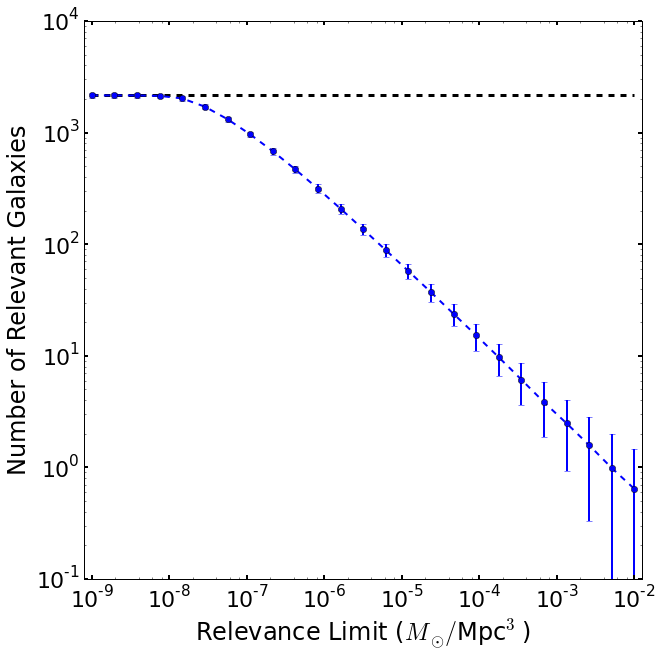

In [31]:
# Plot number of relevant halos vs relevance limit
rel_lim = np.logspace(-9,-2,25)
mean_rel_halos = []
std_rel_halos = []

# Make copy of background catalog
Bc = copy.deepcopy(B)

for relevance_lim in rel_lim:
    print '{:.2f}%'.format(100.*np.log10(relevance_lim)/np.log10(rel_lim[-1])) # Not right yet!
    for lc in Bc.lightcones:
        lc.galaxies = lc.galaxies[lc.galaxies['relevance'] >= relevance_lim]
        lc.galaxy_count = len(lc.galaxies)
        # Calculate mean/std relevant galaxies per lightcone
    relevant_counts = [lc.galaxy_count for lc in Bc.lightcones]
    mean_rel_halos.append(np.mean(relevant_counts))
    std_rel_halos.append(np.std(relevant_counts))
    print 'There are {}+/-{} relevant halos'.format(mean_rel_halos[-1],std_rel_halos[-1])

plt.plot([min(rel_lim),max(rel_lim)],2*[mean_galaxies],'--k',linewidth=3)
plt.errorbar(rel_lim,mean_rel_halos,std_rel_halos,linewidth=2,elinewidth=2,fmt='--o')
plt.gcf().set_size_inches(10,10)
plt.gca().set_xscale('log',nonposy='clip')
plt.gca().set_yscale('log',nonposy='clip')
plt.xlabel(r'Relevance Limit ($M_{\odot}/$Mpc$^3$)',fontsize=24)
plt.ylabel('Number of Relevant Galaxies',fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.gca().tick_params(width=2)
plt.xlim([10**-9.1,10**-1.9])
del Bc

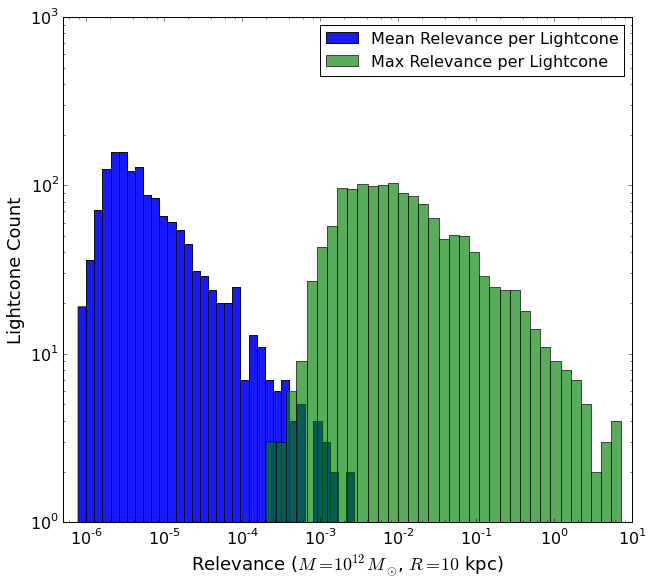

In [32]:
# Plot 'relevance' distribution
if relevance_lim == 0.0 and rel_plots is True:
    mean_relevance = [np.mean(lightcone.galaxies['relevance']) for lightcone in B.lightcones]
    max_relevance = [np.max(lightcone.galaxies['relevance']) for lightcone in B.lightcones]
    
    #plt.subplot(1, 2, 1)
    plt.hist(mean_relevance,label='Mean Relevance per Lightcone',alpha=0.9,log=True,bins=(10**np.linspace(np.log10(np.min(mean_relevance)),np.log10(np.max(mean_relevance)),50)))
    plt.hist(max_relevance,label='Max Relevance per Lightcone',facecolor='green',alpha=0.65,log=True,bins=(10**np.linspace(np.log10(np.min(max_relevance)),np.log10(np.max(max_relevance)),50)))
    plt.gca().set_xscale("log")
    plt.xlabel(r'Relevance ($M=10^{12}M_\odot$, $R=10$ kpc)',fontsize=18)
    #plt.xlabel('Mean Relevance per Lightcone',fontsize=18)
    plt.ylabel('Lightcone Count'.format(B.galaxy_count),fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.legend(fontsize=16)
    
    '''
    plt.subplot(1, 2, 2)
    max_relevance = [np.max(lightcone.galaxies['relevance']) for lightcone in B.lightcones]
    plt.hist(max_relevance,alpha=0.75,log=True,bins=(10**np.linspace(np.log10(np.min(max_relevance)),np.log10(np.max(max_relevance)),50)))
    plt.gca().set_xscale("log")
    plt.xlabel('Max Relevance per Lightcone',fontsize=18)
    plt.ylabel('Lightcone Count'.format(B.galaxy_count),fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=16)
    '''
    plt.xlim([5e-7,10])
    plt.gcf().tight_layout()
    plt.gcf().set_size_inches(10,10)

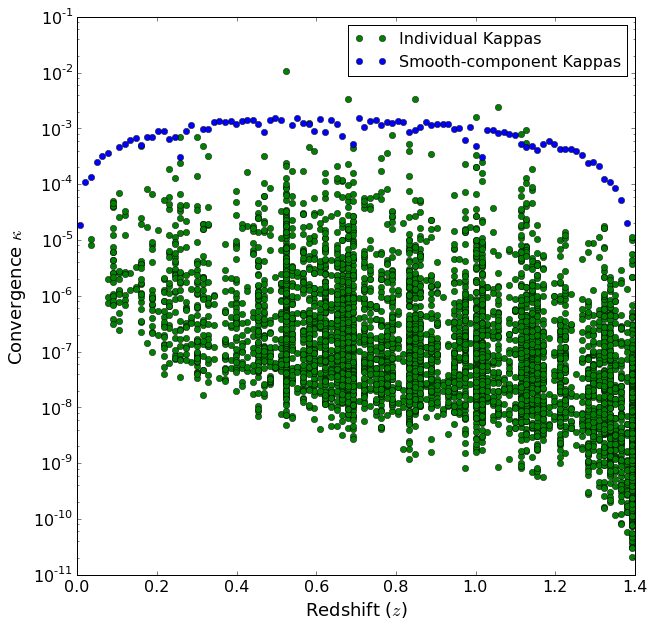

In [25]:
# Plot smooth-component correction densities and contributtions
if smooth_plots is True:
    lc = B.lightcones[np.random.randint(0,B.galaxy_count)]
    lc.plot_kappas(show=False)
    
plt.gcf().set_size_inches(10,10)

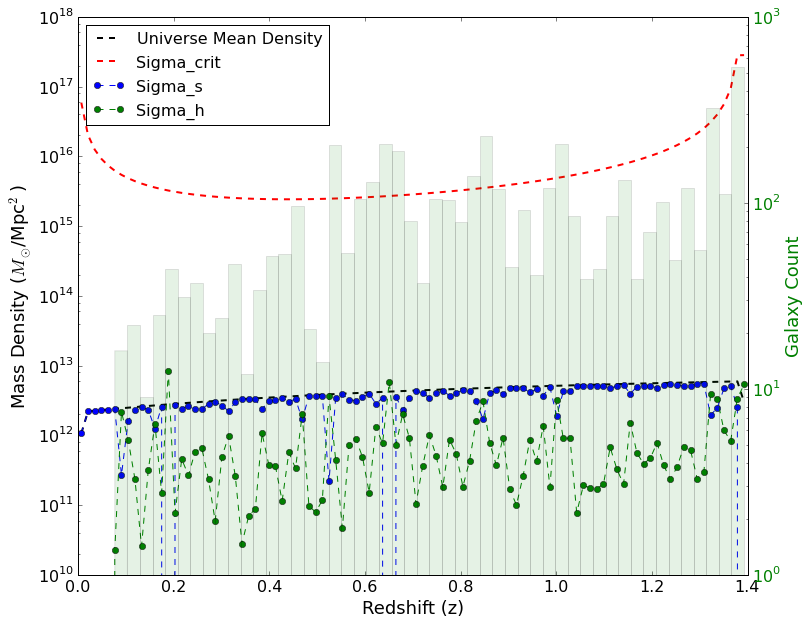

In [24]:
# Plot smooth-component correction densities
if smooth_plots is True:
    lc = B.lightcones[np.random.randint(0,B.galaxy_count)]
    pangloss.plotting.plot_densities(F,lc,density_type='surface',show=False,label=False)
    
plt.gcf().set_size_inches(12,10)

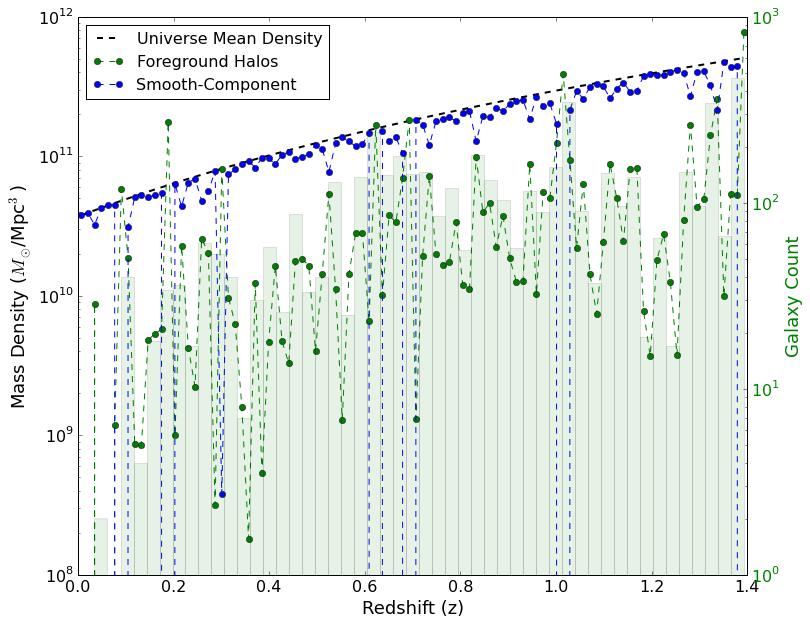

In [23]:
# Plot smooth-component correction densities
if smooth_plots is True:
    lc = B.lightcones[np.random.randint(0,B.galaxy_count)]
    pangloss.plotting.plot_densities(F,lc,density_type='volume',show=False,label=False)
    
plt.gcf().set_size_inches(12,10)

## Correlation Functions

Calculating correlation...


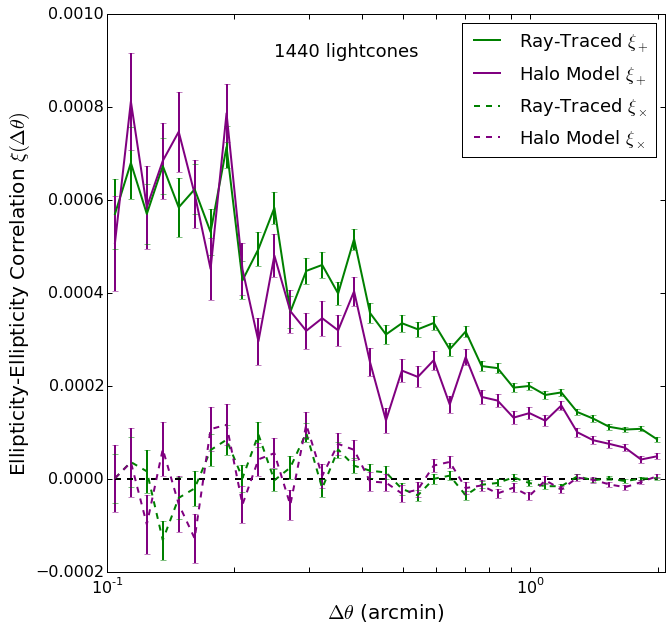

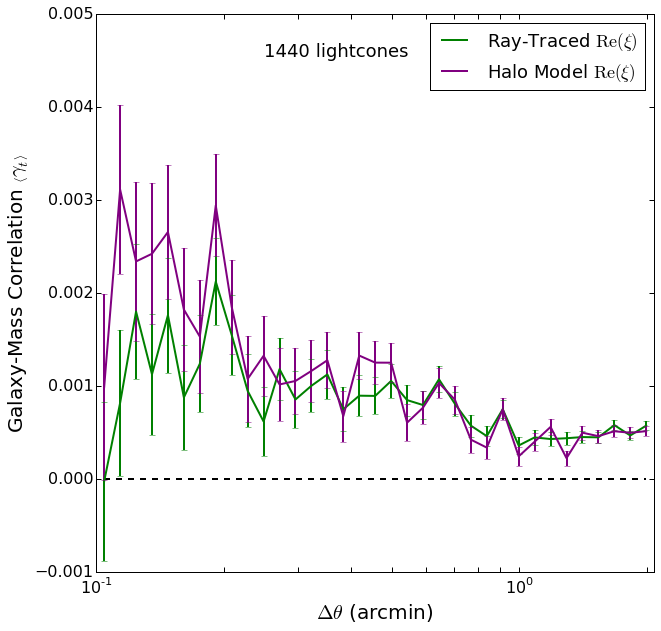

In [11]:
if corr_plots is True:
    # Calculate the correlation function for each lensing type
    if vb is True: print('Calculating correlation...')
    gg_map = B.calculate_corr(corr_type='gg',lensed='map',foreground=F)
    gg_halo = B.calculate_corr(corr_type='gg',lensed='halo',foreground=F)
    ng_map = B.calculate_corr(corr_type='ng',lensed='map',foreground=F)
    ng_halo = B.calculate_corr(corr_type='ng',lensed='halo',foreground=F)

    if rel_compare is True:
        # Calculate the correlation function using only most relevant halos
        gg_halo_r = B_rel.calculate_corr(corr_type='gg',lensed='halo',foreground=F)
        ng_halo_r = B_rel.calculate_corr(corr_type='ng',lensed='halo',foreground=F)

    if smooth_compare is True:
        # Calculate the correlation function using the smooth-component correction
        gg_halo_s = B_smooth.calculate_corr(corr_type='gg',lensed='halo',foreground=F)
        ng_halo_s = B_smooth.calculate_corr(corr_type='ng',lensed='halo',foreground=F)

    # Plot the correlation functions
    pangloss.plotting.plot_corr(gg_map,corr_type='gg',corr_comp='plus',lensed='map',color='green',galaxy_count=B.galaxy_count)
    pangloss.plotting.plot_corr(gg_halo,corr_type='gg',corr_comp='plus',lensed='halo',color='purple')
    pangloss.plotting.plot_corr(gg_map,corr_type='gg',corr_comp='cross',lensed='map',color='green')
    pangloss.plotting.plot_corr(gg_halo,corr_type='gg',corr_comp='cross',lensed='halo',color='purple')
    plt.gcf().set_size_inches(10,10)
    plt.show()

    pangloss.plotting.plot_corr(ng_map,corr_type='ng',corr_comp='real',lensed='map',color='green',galaxy_count=B.galaxy_count)
    pangloss.plotting.plot_corr(ng_halo,corr_type='ng',corr_comp='real',lensed='halo',color='purple')
    plt.gcf().set_size_inches(10,10)
    plt.show()

Ellipticity-Ellipticity correlation difference intrinsic to mapped: chi^2:  360.490200686 n_sigma:  18.4844779508 percent_err:  32.0825773637 +\- 0.0823329733306
Galaxy-Galaxy correlation difference intrinsic to mapped: chi^2:  25.5586448347 n_sigma:  -1.2169646334 percent_err:  39.6924842771 +\- 0.246900050553
Comparing correlations (rel)...


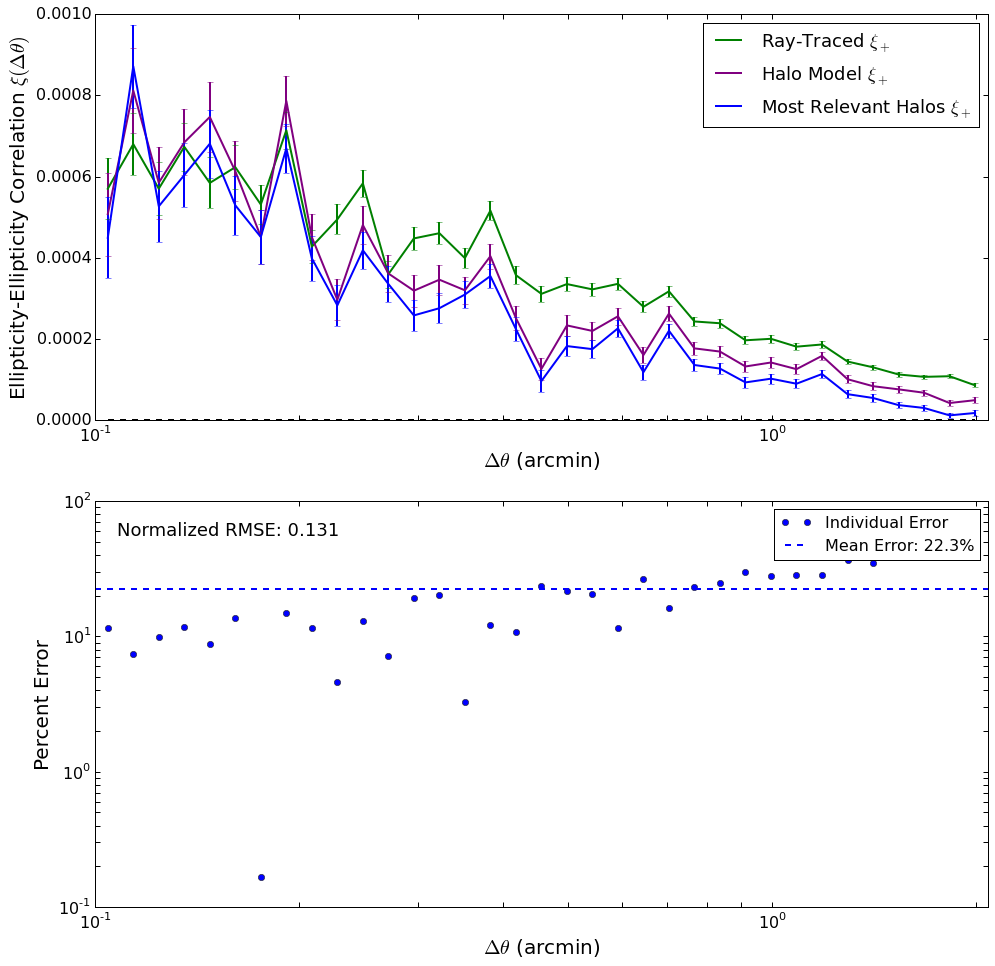

In [35]:
if corr_plots is True:
    # Compare the correlation functions
    chi2,n_sigma,percent_err,std_err = B.compare_corr(gg_halo,gg_map,corr_type='gg',corr_comp='plus')
    print 'Ellipticity-Ellipticity correlation difference intrinsic to mapped:','chi^2: ',chi2,'n_sigma: ',n_sigma,'percent_err: ',percent_err,'+\-',std_err

    chi2,n_sigma,percent_err,std_err = B.compare_corr(ng_halo,ng_map,corr_type='ng',corr_comp='real')
    print 'Galaxy-Galaxy correlation difference intrinsic to mapped:','chi^2: ',chi2,'n_sigma: ',n_sigma,'percent_err: ',percent_err,'+\-',std_err

    if rel_compare is True:
        # Compare the correlations for intrinsic, halos, and relevant halos
        if vb is True: print('Comparing correlations (rel)...')
        #pangloss.plotting.compare_relevant_halos(gg_map,gg_halo,gg_halo_r,corr_type='gg',galaxy_count=B.galaxy_count,radius=lc_radius,rel_halos=[mean_rel,std_rel],fig_size=10,show=False)
        pangloss.plotting.compare_relevant_halos(gg_map,gg_halo,gg_halo_r,corr_type='gg',fig_size=10,show=False)
        plt.gcf().set_size_inches(16,16)
        
#plt.subplots_adjust(wspace=0, hspace=0)

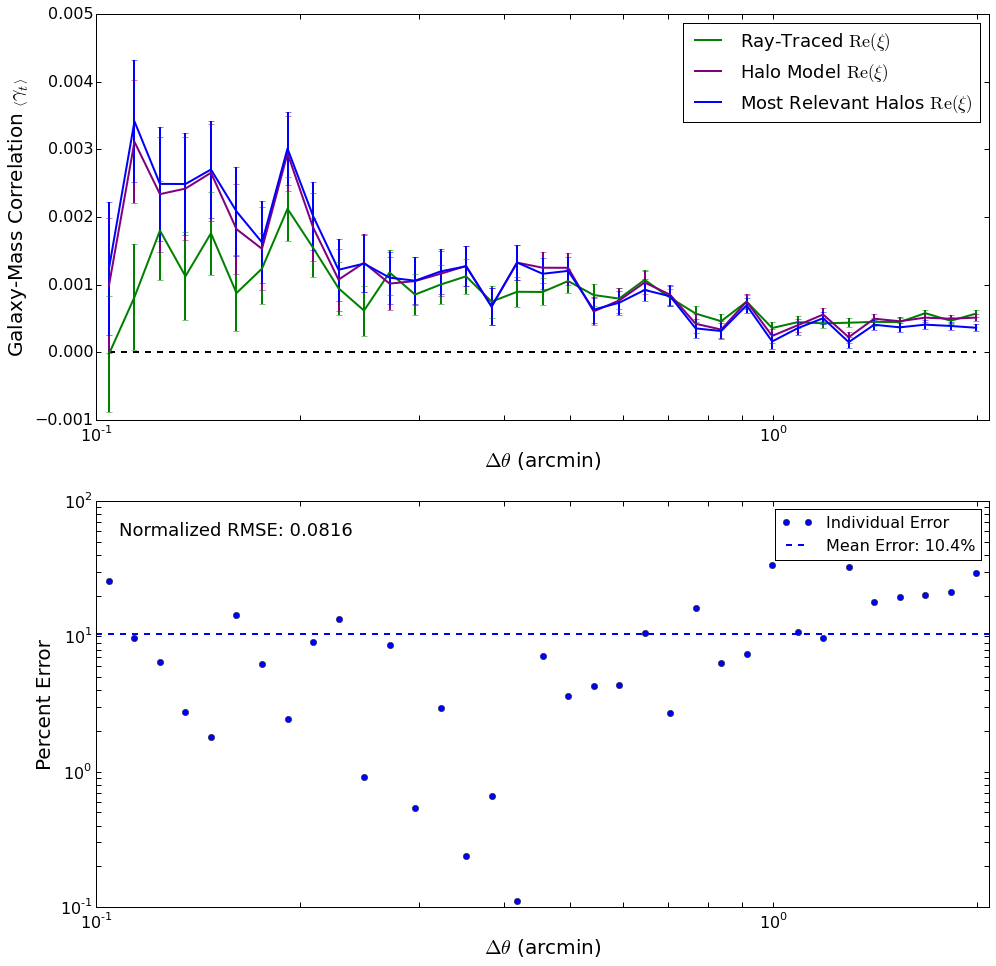

In [36]:
if corr_plots is True:
    if rel_compare is True:
        pangloss.plotting.compare_relevant_halos(ng_map,ng_halo,ng_halo_r,corr_type='ng',fig_size=10,show=False)
        #pangloss.plotting.compare_relevant_halos(ng_map,ng_halo,ng_halo_r,corr_type='ng',galaxy_count=B.galaxy_count,radius=lc_radius,rel_halos=[mean_rel,std_rel],fig_size=10,show=False)        
        plt.gcf().set_size_inches(16,16)

In [14]:
if corr_plots is True:
    if smooth_compare is True:
        # Compare the correlations for intrinsic, halos, and halos with smooth-component correction
        if vb is True: print('Comparing correlations (smooth)...')
        if rel_compare is False:
            mean_rel =  None
            std_rel = None
        pangloss.plotting.compare_smooth_component(gg_map,gg_halo,gg_halo_s,corr_type='gg',galaxy_count=B.galaxy_count,radius=lc_radius,rel_halos=[mean_rel,std_rel])
        pangloss.plotting.compare_smooth_component(ng_map,ng_halo,ng_halo_s,corr_type='ng',galaxy_count=B.galaxy_count,radius=lc_radius,rel_halos=[mean_rel,std_rel])


## Maps

UnboundLocalError: local variable 'world' referenced before assignment

/home/spencer/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/spencer/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


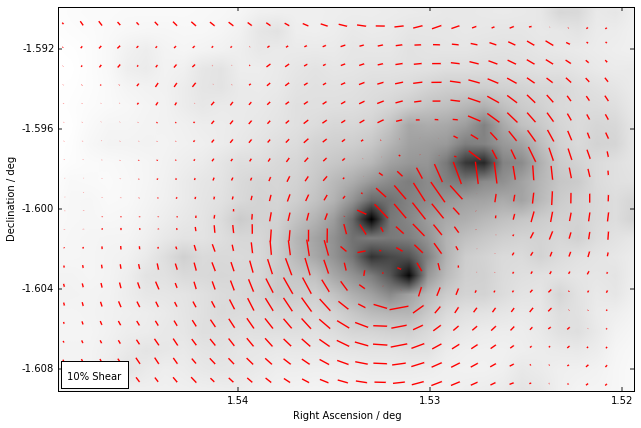

In [15]:
# Plot a map near a lens
if maps is True:
    K.plot(fig_size=10,subplot=[1.55,1.52,-1.61,-1.59])
    S.plot()
    B.plot(lensed='all',graph='stick')
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.show()

## Kappamaps

For `kappamaps`, use `binmap_test.py` in `/tests`

## Lightcone Plot

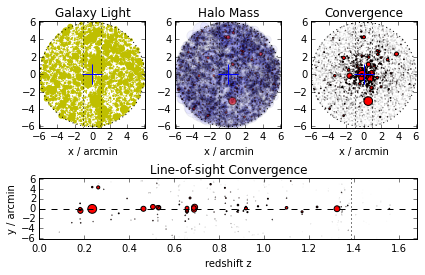

In [16]:
num = np.random.randint(0,B.galaxy_count)
lc = B.lightcones[num]

lc.plot(output='/home/spencer/Desktop/thesis_figures/lightcone_plots')
plt.gcf().tight_layout()
#plt.gcf().set_size_inches(8,12)

## Progression Correlation Plots

Takes quite a bit of memory. This is done in `/tests/correlation_progression.py` 

## MLE vs ABC

In [8]:
# Data taken from `mle_vs_abc.py`
N = [100,500,1000,5000,10000,50000,100000,500000,1000000]

mle_mean = [0.0026131749,0.0025026798,0.0025091648,0.0026822805,0.0027221203,0.0036690235,0.0048076391,0.0152271032,0.0273695946]
mle_std = 2.*np.array([0.0003236185,8.45E-005,4.79E-005,0.0002004562,5.00E-005,0.0002973605,0.000471589,0.0006906225,0.000154555])

abc_mean = [0.0032175422,0.0027898312,0.0037491083,0.0238895893,0.062359786,0.6672950506,1.6731032133,11.2056146145,23.0262452126]
abc_std = np.array([0.0012904355,0.0019899555,0.0016023828,0.0034368445,0.002518307,0.0071568175,0.0075635204,0.0699893303,0.1698420219])


(79.43282347242814, 1258925.411794166)

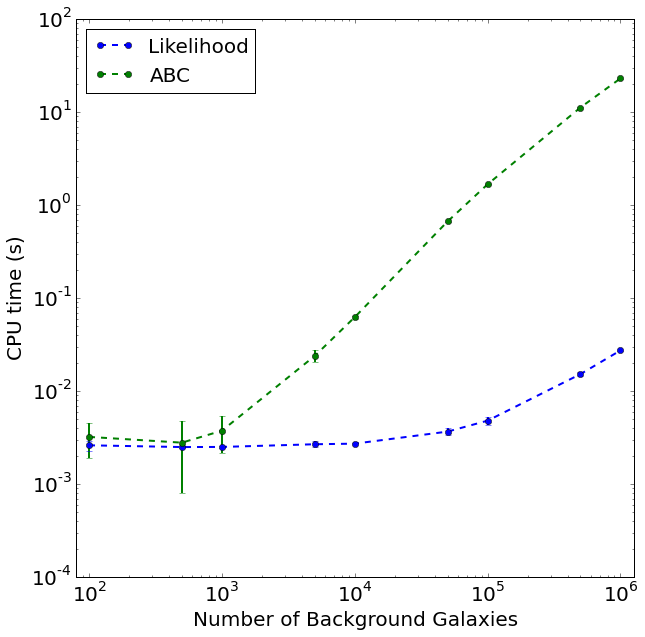

In [9]:
plt.errorbar(N,mle_mean,mle_std,fmt='--o',label='Likelihood',linewidth=2,elinewidth=2)
plt.errorbar(N,abc_mean,abc_std,fmt='--o',label='ABC',linewidth=2,elinewidth=2)
plt.gca().set_xscale('log',nonposy='clip')
plt.gca().set_yscale('log',nonposy='clip')
plt.gcf().set_size_inches(10,10)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=18)
plt.xlabel('Number of Background Galaxies',fontsize=20)
plt.ylabel('CPU time (s)',fontsize=20)

# get handles
handles, labels = plt.gca().get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
plt.gca().legend(handles,labels,fontsize=20,loc=2)

#plt.legend(fontsize=20,loc=2)
plt.xlim([10**1.9,10**6.1])

## CPU Runtime

(0, 200)

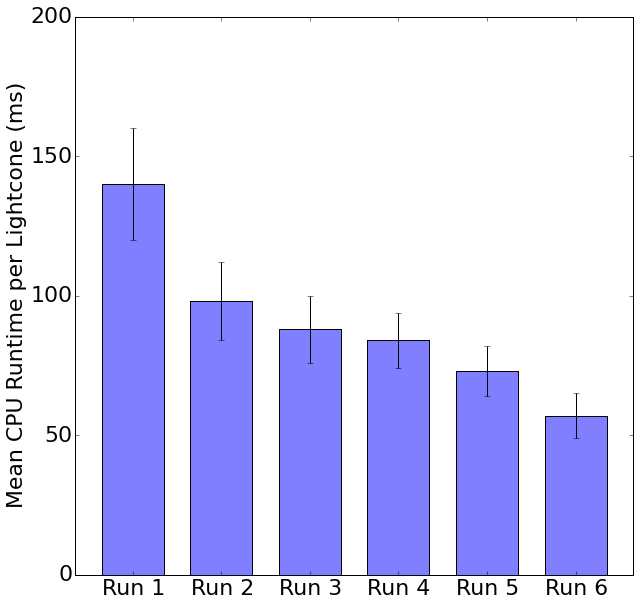

In [65]:
# Create profiling bar

# Mean and std CPU times in ms
cpu = np.array([140,98,88,84,73,57])
cpu_std = np.array([20,14,12,10,9,8])

# Bar plot kwargs
ind = np.arange(len(cpu)) + 0.3
width = 0.7
c = (0,0,1,0.5)
ec = 'black'

bars = plt.gca().bar(ind,cpu,width,color=c,yerr=cpu_std,ecolor=ec)

ax = plt.gca()
ax.set_xticks(ind+width/2.0)
ax.set_xticklabels( ('Run 1', 'Run 2', 'Run 3', 'Run 4', 'Run 5', 'Run 6') )

plt.gcf().set_size_inches(10,10)
plt.tick_params(labelsize=22)
ax.set_ylabel('Mean CPU Runtime per Lightcone (ms)')
ax.xaxis.label.set_size(22)
ax.yaxis.label.set_size(22)
ax.set_xlim([0,max(ind)+width+0.3])
ax.set_ylim([0,200])
#plt.show()

"\n# Make figure\nfig = plt.figure()\nax1 = fig.add_subplot(111)\nax2 = ax1.twiny()\n\nplt.errorbar(r,mean_cpu_r,std_cpu_r,fmt='--o',label='Scales with Radius',linewidth=2,elinewidth=2)\nplt.errorbar(r[::-1],mean_cpu_rel,std_cpu_rel,fmt='--og',label='Scales with Relevance',linewidth=2,elinewidth=2)\nax1.set_xlabel('$R_L$ (arcminutes)',fontsize=22)\nax1.set_ylabel('Mean CPU Runtime per Lightcone (ms)',fontsize=22)\nax1.tick_params(axis='both', which='major', labelsize=22)\nax1.tick_params(axis='both', which='minor', labelsize=20)\nax1.tick_params(width=2)\nax1.set_xlim([0,9])\nplt.legend()\n\n# Set x-axis color\nfor tl in ax1.get_xticklabels():\n    tl.set_color('b')\n\n\nax2.set_xlabel(r'Relevance Limit ($M_\\odot/$Mpc$^3$)',fontsize=22)\nax2.set_xlim(ax1.get_xlim())\nnew_tick_locations = np.array([1,2,4,6,8])\nax2.set_xticks(new_tick_locations)\nax2.set_xticklabels(rel)\nax2.tick_params(axis='both', which='major', labelsize=20)\nax2.tick_params(width=2)\nax2.set_xlim(ax1.get_xlim())\n

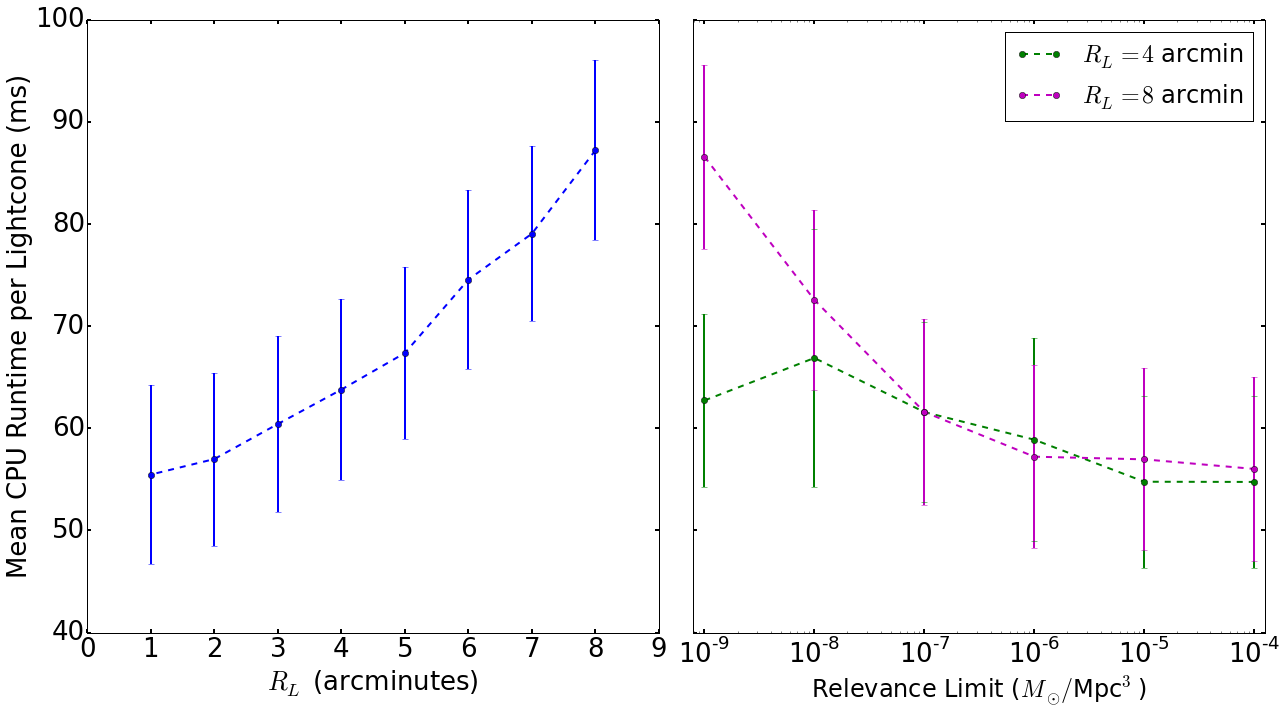

In [73]:
#

r = [8,7,6,5,4,3,2,1]
rel = [10**-9,10**-8,10**-7,10**-6,10**-5,10**-4]

mean_cpu_r = 1000*np.array([0.0872069486,0.0790450745,0.0745517405,0.0673640784,0.0637835748,0.0604161872,0.0569860929,0.0554680664])
std_cpu_r = 1000*np.array([0.0088199582,0.0085342689,0.0087417778,0.008426611,0.0088359104,0.0085655993,0.0084684955,0.0087288995])

mean_cpu_rel4 = 1000*np.array([0.0627195307,0.0668798647,0.0615872751,0.0588829454,0.0547690536,0.054748989])
std_cpu_rel4 = 1000*np.array([0.0084430517,0.0125937753,0.0087765861,0.0099598549,0.008422914,0.0084022212])

mean_cpu_rel8 = 1000*np.array([0.0865792203,0.072562223,0.0615903902,0.0572200302,0.0569582793,0.0560223445])
std_cpu_rel8 = 1000*np.array([0.0090003505,0.0087919467,0.0091428856,0.008967923,0.0089110221,0.0090423268])

# Two subplots, unpack the axes array immediately
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.errorbar(r,mean_cpu_r,std_cpu_r,fmt='--o',label='Scales with Radius',linewidth=2,elinewidth=2)
ax1.set_xlabel('$R_L$ (arcminutes)',fontsize=26)
ax1.set_ylabel('Mean CPU Runtime per Lightcone (ms)',fontsize=26)
ax1.tick_params(axis='both', which='major', labelsize=26)
ax1.tick_params(axis='both', which='minor', labelsize=24)
ax1.tick_params(width=2)
ax1.set_xlim([0,9])

ax2.errorbar(rel,mean_cpu_rel4,std_cpu_rel4,fmt='--og',label=r'$R_L=4$ arcmin',linewidth=2,elinewidth=2)
ax2.errorbar(rel,mean_cpu_rel8,std_cpu_rel8,fmt='--om',label=r'$R_L=8$ arcmin',linewidth=2,elinewidth=2)
ax2.set_xlabel(r'Relevance Limit ($M_\odot/$Mpc$^3$)',fontsize=24)
ax2.set_xscale('log')
ax2.tick_params(axis='both', which='major', labelsize=26)
ax2.tick_params(axis='both', which='minor', labelsize=24)
ax2.tick_params(width=2)
ax2.set_xlim([10**-9.1,10**-3.9])

# get handles
handles, labels = ax2.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax2.legend(handles,labels,fontsize=24)

fig.set_size_inches(18,10)
fig.tight_layout()

'''
# Make figure
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

plt.errorbar(r,mean_cpu_r,std_cpu_r,fmt='--o',label='Scales with Radius',linewidth=2,elinewidth=2)
plt.errorbar(r[::-1],mean_cpu_rel,std_cpu_rel,fmt='--og',label='Scales with Relevance',linewidth=2,elinewidth=2)
ax1.set_xlabel('$R_L$ (arcminutes)',fontsize=22)
ax1.set_ylabel('Mean CPU Runtime per Lightcone (ms)',fontsize=22)
ax1.tick_params(axis='both', which='major', labelsize=22)
ax1.tick_params(axis='both', which='minor', labelsize=20)
ax1.tick_params(width=2)
ax1.set_xlim([0,9])
plt.legend()

# Set x-axis color
for tl in ax1.get_xticklabels():
    tl.set_color('b')


ax2.set_xlabel(r'Relevance Limit ($M_\odot/$Mpc$^3$)',fontsize=22)
ax2.set_xlim(ax1.get_xlim())
new_tick_locations = np.array([1,2,4,6,8])
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(rel)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(width=2)
ax2.set_xlim(ax1.get_xlim())

# Set second x-axis color
for tl in ax2.get_xticklabels():
    tl.set_color('g')
    
# get handles
handles, labels = plt.gca().get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
plt.legend(handles,labels,loc=2,fontsize=20)

fig.set_size_inches(10,10)
'''